<a href="https://colab.research.google.com/github/indrap23/PJJDA/blob/main/Latihan_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocessing & Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    confusion_matrix,
    RocCurveDisplay,
    ConfusionMatrixDisplay # Menggantikan plot_confusion_matrix
)

In [40]:
PATH = 'https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/04.%20Data%20Preparation/dataset/titanic.csv'
df_titanic = pd.read_csv(PATH)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
#spliting data
def split_input_output(dataset,
                       target_column,
                       save_file = True,
                       return_file = True):

    output_df = dataset[target_column]
    input_df = dataset.drop([target_column],
                            axis = 1)
    return output_df, input_df

def split_train_test(x, y, TEST_SIZE):
    x_train, x_test,\
        y_train, y_test = train_test_split(x,
                                           y,
                                           test_size=TEST_SIZE,
                                           random_state=123)
    return x_train, x_test, y_train, y_test

In [43]:
#kita pecah
TARGET = "Survived"
TEST_SIZE = 0.3
output_df, input_df = split_input_output(df_titanic,
                                         TARGET)
x_train, x_test, y_train, y_test = split_train_test(input_df,
                                                    output_df,
                                                    TEST_SIZE)

In [44]:
#cek stratifikasi
print(y_train.value_counts(normalize = True))
print("-------------------------------------")
print(y_test.value_counts(normalize = True))

Survived
0    0.608347
1    0.391653
Name: proportion, dtype: float64
-------------------------------------
Survived
0    0.634328
1    0.365672
Name: proportion, dtype: float64


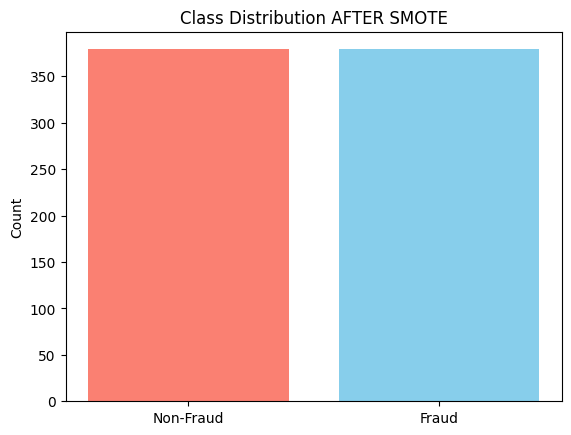

In [67]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

plt.bar(y_train_sm.value_counts().index, y_train_sm.value_counts().values,
        color=['skyblue','salmon'])
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.ylabel("Count")
plt.title("Class Distribution AFTER SMOTE")
plt.show()

EDA

In [45]:
# combine x_train and y_train
df = pd.concat([x_train, pd.DataFrame(y_train)], axis = 1)

# check initial features
df.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'], dtype=object)

In [20]:
df.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,131
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,481


In [46]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,623.000000,623.000000,492.000000,623.000000,623.000000,623.000000,623.000000
mean,441.298555,2.321027,29.885691,0.516854,0.365971,33.326872,0.391653
std,254.833804,0.831257,14.316719,1.143676,0.784249,54.337449,0.488512
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,219.500000,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,444.000000,3.000000,28.000000,0.000000,0.000000,14.400000,0.000000
75%,653.000000,3.000000,38.000000,1.000000,0.000000,30.597900,1.000000
max,891.000000,3.000000,80.000000,8.000000,5.000000,512.329200,1.000000


In [47]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,623,623,623,142,621
unique,623,2,513,108,3
top,"Daly, Mr. Eugene Patrick",male,CA. 2343,G6,S
freq,1,401,7,4,455


In [48]:
df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.639456
1,2,0.465116
2,3,0.259366


In [49]:
df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.743243
1,male,0.197007


In [50]:
df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.559633
1,Q,0.421053
2,S,0.345055


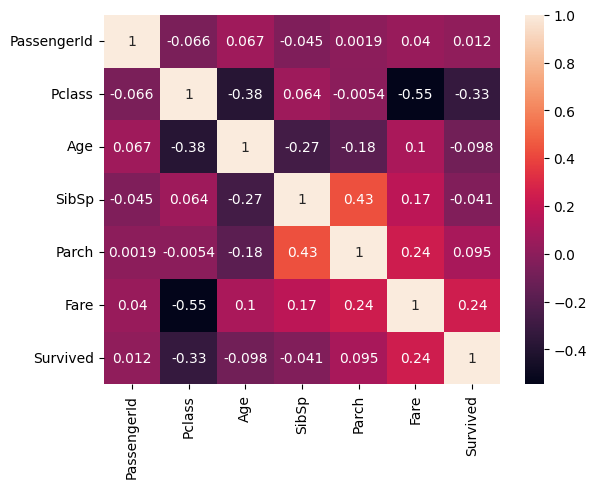

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)
plt.show()

In [52]:
#drop row embarked
df.dropna(subset=['Embarked'], inplace=True)


In [53]:
#feature baru untuk gelar
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

#drop age, cabin, PassengerId, ticket
df = df.drop(['Age', 'Cabin', 'PassengerId', 'Ticket','Name'], axis=1)
df.head()

,count
Title,
Mr,366
Miss,134
Mrs,81
Master,27
Dr,2
Rev,2
Ms,1
Mme,1
Major,1


,Pclass,Sex,SibSp,Parch,Fare,Embarked,Survived,Title
416,2,female,1,1,32.5000,S,1,Mrs
801,2,female,1,1,26.2500,S,1,Mrs
512,1,male,0,0,26.2875,S,1,Mr
455,3,male,0,0,7.8958,C,1,Mr
757,2,male,0,0,11.5000,S,0,Mr


In [54]:
# combine x_train and y_train
df_test = pd.concat([x_test, pd.DataFrame(y_test)], axis = 1)

# check initial features
df_test.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'], dtype=object)

In [55]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
172,173,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S,1
524,525,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,NaN,C,0
452,453,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C,0
170,171,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,0
620,621,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...
372,373,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.0500,NaN,S,0
119,120,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,0
417,418,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.0000,NaN,S,1
584,585,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C,0


In [56]:
#feature baru untuk gelar
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

#drop age, cabin, PassengerId, ticket
df_test = df_test.drop(['Age', 'Cabin', 'PassengerId', 'Ticket','Name'], axis=1)
df_test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Survived,Title
172,3,female,1,1,11.1333,S,1,Miss
524,3,male,0,0,7.2292,C,0,Mr
452,1,male,0,0,27.7500,C,0,Mr
170,1,male,0,0,33.5000,S,0,Mr
620,3,male,1,0,14.4542,C,0,Mr


In [57]:
#build ulang data test dan train
X_train = df.drop('Survived', axis=1)
y_train = df['Survived']
X_test = df_test.drop('Survived', axis=1)
y_test = df_test['Survived']

In [70]:
# Combine X_train and X_test for consistent one-hot encoding
combined_X = pd.concat([X_train, X_test], ignore_index=True)

# Apply one-hot encoding
combined_X = pd.get_dummies(combined_X)

# Split back into X_train and X_test
X_train = combined_X.iloc[:len(X_train)]
X_test = combined_X.iloc[len(X_train):]

#modeling

In [61]:
# Changing everything to float and replacing infinities
for c in X_train.columns:
    X_train[c] = X_train[c].astype(np.float64)
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [63]:
# Changing everything to float and replacing infinities
for c in X_test.columns:
    X_test[c] = X_test[c].astype(np.float64)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [58]:
from collections import Counter
from sklearn.datasets import make_classification
# from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb

In [64]:
def baseline_model(X_train,y_train):
  clf_logreg = LogisticRegression().fit(X_train,y_train)
  clf_rf = RandomForestClassifier().fit(X_train,y_train)
  clf_tree = DecisionTreeClassifier().fit(X_train,y_train)
  clf_knn = KNeighborsClassifier().fit(X_train,y_train)
  clf_lgbm = LGBMClassifier().fit(X_train,y_train)
  clf_xgb = xgb.XGBClassifier().fit(X_train,y_train)

  gini_logreg = (2*(roc_auc_score(y_train, clf_logreg.predict_proba(X_train)[:, 1])))-1
  gini_rf = (2*(roc_auc_score(y_train, clf_rf.predict_proba(X_train)[:, 1])))-1
  gini_tree = (2*(roc_auc_score(y_train, clf_tree.predict_proba(X_train)[:, 1])))-1
  gini_knn = (2*(roc_auc_score(y_train, clf_knn.predict_proba(X_train)[:, 1])))-1
  gini_lgbm = (2*(roc_auc_score(y_train, clf_lgbm.predict_proba(X_train)[:, 1])))-1
  gini_xgb = (2*(roc_auc_score(y_train, clf_xgb.predict_proba(X_train)[:, 1])))-1

  print("Gini Performance Evaluation\n")
  print(f"Logistic Regression Gini : {gini_logreg}")
  print(f"Random Forest Gini       : {gini_rf}")
  print(f"Decision Tree Gini       : {gini_tree}")
  print(f"KNN Classifier Gini      : {gini_knn}")
  print(f"LGBM Gini                : {gini_lgbm}")
  print(f"XGBoost Gini             : {gini_xgb}")

  return clf_logreg, clf_rf, clf_tree, clf_knn, clf_lgbm, clf_xgb

clf_logreg, clf_rf, clf_tree, clf_knn, clf_lgbm, clf_xgb = baseline_model(X_train,y_train)

[LightGBM] [Info] Number of positive: 242, number of negative: 379
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 621, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.389694 -> initscore=-0.448598
[LightGBM] [Info] Start training from score -0.448598
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Hyperparameter Tunning

In [65]:
%%time

clf_xgb = xgb.XGBClassifier()
clf_tree = DecisionTreeClassifier()
clf_rf = RandomForestClassifier()

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=69)

# Define search space
space_tree = dict()
space_rf = dict()
space_xgb = [
  {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'clf__max_depth': range(3, 10),
    'clf__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'clf__gamma': [i/10.0 for i in range(3)],
#     'fs__score_func': [chi2],
    'fs__k': [10],
  }
]

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] #RF
max_depth.append(None) #RF
space_rf['max_depth'] = max_depth # RF
space_rf['min_samples_split'] = [2, 5, 10] # RF
space_rf['min_samples_leaf'] = [1, 2, 4] # RF

space_tree['max_depth'] = [2, 3, 5, 10, 20] #DT
space_tree['min_samples_leaf'] = [5, 10, 20, 50, 100] #DT
space_tree['criterion'] = ["gini", "entropy"] #DT

# Define search
search_tree = RandomizedSearchCV(clf_tree, space_tree, n_iter=30, scoring='roc_auc', n_jobs=30, cv=cv, random_state=69)
search_rf = RandomizedSearchCV(clf_rf, space_rf, n_iter=30, scoring='roc_auc', n_jobs=30, cv=cv, random_state=69)
search_xgb = RandomizedSearchCV(clf_xgb, space_xgb, n_iter=30, scoring='roc_auc', n_jobs=30, cv=cv, random_state=69)

# Execute search
result_tree = search_tree.fit(X_train, y_train)
result_rf = search_rf.fit(X_train, y_train)
result_xgb = search_xgb.fit(X_train, y_train)

# Summarize result
print('Best Score tree: %s' % ((result_tree.best_score_ * 2) - 1))
print('Best Hyperparameters: %s' % result_tree.best_params_)

print('Best Score rf: %s' % ((result_rf.best_score_*2) - 1))
print('Best Hyperparameters: %s' % result_rf.best_params_)

print('Best Score xgb: %s' % ((result_xgb.best_score_*2) - 1))
print('Best Hyperparameters: %s' % result_xgb.best_params_)

Best Score tree: 0.7137187648174492
Best Hyperparameters: {'min_samples_leaf': 5, 'max_depth': 20, 'criterion': 'entropy'}
Best Score rf: 0.7495350284495021
Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best Score xgb: 0.7164837600758651
Best Hyperparameters: {'fs__k': 10, 'clf__n_estimators': 50, 'clf__max_depth': 3, 'clf__learning_rate': 0.01, 'clf__gamma': 0.2, 'clf__colsample_bytree': 0.2}
CPU times: user 4.87 s, sys: 243 ms, total: 5.12 s
Wall time: 3min 19s


In [71]:
clf_rf = RandomForestClassifier(min_samples_split= 2, min_samples_leaf=2, max_depth= None).fit(X_train,y_train)
clf_tree = DecisionTreeClassifier(min_samples_leaf= 5, max_depth=20, criterion='entropy').fit(X_train,y_train)
clf_xgb = xgb.XGBClassifier(fs__k=10, clf__n_estimators=50, clf__max_depth=3, clf__learning_rate=0.01, clf__gamma=0.2, clf__colsample_bytree=0.2).fit(X_train,y_train)

gini_rf = (2*(roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:, 1])))-1
gini_tree = (2*(roc_auc_score(y_test, clf_tree.predict_proba(X_test)[:, 1])))-1
gini_xgb = (2*(roc_auc_score(y_test, clf_xgb.predict_proba(X_test)[:, 1])))-1

print(f"Random Forest Gini       : {gini_rf}")
print(f"Decision Tree Gini       : {gini_tree}")
print(f"XGBoost Gini             : {gini_xgb}")

Random Forest Gini       : 0.7538415366146458
Decision Tree Gini       : 0.7288115246098439
XGBoost Gini             : 0.765126050420168
